In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
trace = np.load('simulation_1.npy')
plt.plot(trace[:100000])
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
def get_spikes(data, spike_window=80, tf=5, offset=10, max_thresh=350):
    # extract spike waveforms
    # Calculate threshold based on data mean
    thresh = np.mean(np.abs(data)) *tf

    # Find positions wherere the threshold is crossed
    pos = np.where(data > thresh)[0]
    pos = pos[pos > spike_window]

    # Extract potential spikes and align them to the maximum
    spike_samp = []
    wave_form = np.empty([1, spike_window*2])
    for i in pos:
        if i < data.shape[0] - (spike_window+1):
            # Data from position where threshold is crossed to end of window
            tmp_waveform = data[i:i+spike_window*2]

            # Check if data in window is below upper threshold (artifact rejection)
            if np.max(tmp_waveform) < max_thresh:
                # Find sample with maximum data point in window
                tmp_samp = np.argmax(tmp_waveform) +i

                # Re-center window on maximum sample and shift it by offset
                tmp_waveform = data[tmp_samp-(spike_window-offset):tmp_samp+(spike_window+offset)]

                # Append data
                spike_samp = np.append(spike_samp, tmp_samp)
                wave_form = np.append(wave_form, tmp_waveform.reshape(1, spike_window*2), axis=0)

    # Remove duplicates
    ind = np.where(np.diff(spike_samp) > 1)[0]
    spike_samp = spike_samp[ind]
    wave_form = wave_form[ind]

    return spike_samp, wave_form

In [3]:
spike_samp, wave_form = get_spikes(trace, tf=5)

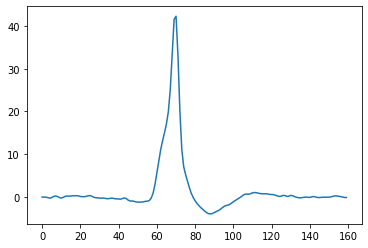

In [4]:
plt.plot(wave_form[:].mean(axis=0))


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(wave_form)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
import pandas as pd

In [7]:
result=pd.DataFrame(pca.transform(wave_form), columns=['PCA%i' % i for i in range(2)])


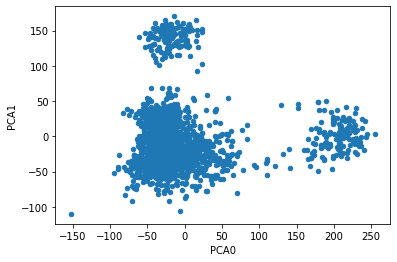

In [8]:
result.plot.scatter(x='PCA0',y='PCA1')  # looks like it has 3 neurons

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(wave_form) # clustered to 3 types

In [11]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 1])

Text(0, 0.5, 'PCA1')

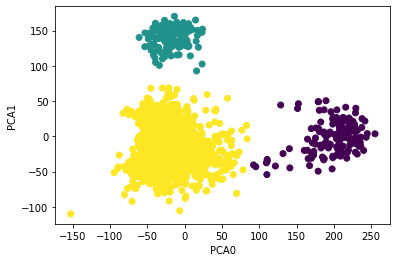

In [12]:
plt.scatter(x=result['PCA0'],y=result['PCA1'],c=kmeans.labels_)  # plot the result
plt.xlabel('PCA0')
plt.ylabel('PCA1')

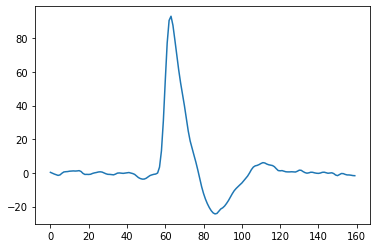

In [13]:
plt.plot(wave_form[kmeans.labels_==0].mean(axis=0))  # plot eacch neuron's peak


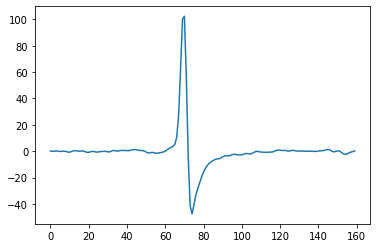

In [14]:
plt.plot(wave_form[kmeans.labels_==1].mean(axis=0))


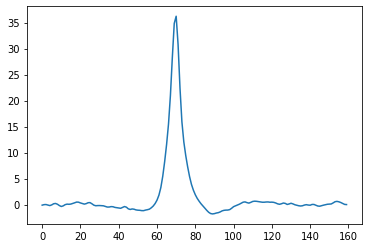

In [15]:
plt.plot(wave_form[kmeans.labels_==2].mean(axis=0))


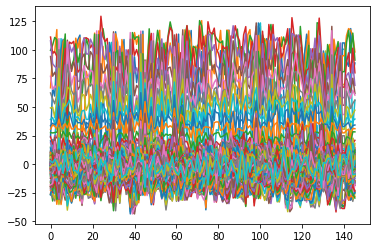

In [18]:
plt.plot(wave_form[kmeans.labels_==0]) ## overlay


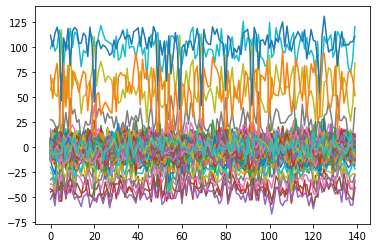

In [19]:
plt.plot(wave_form[kmeans.labels_==1]) ## overlay


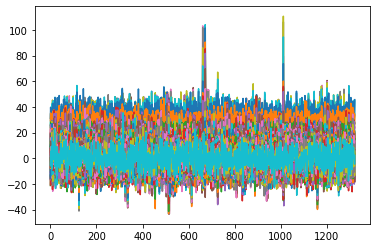

In [17]:
plt.plot(wave_form[kmeans.labels_==2]) ## overlay


In [20]:
# try tf=10

spike_samp, wave_form = get_spikes(trace, tf=10)

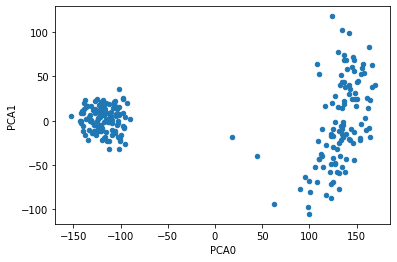

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(wave_form)

result=pd.DataFrame(pca.transform(wave_form), columns=['PCA%i' % i for i in range(2)])
result.plot.scatter(x='PCA0',y='PCA1')  # still looks like 3 neurons

Text(0, 0.5, 'PCA1')

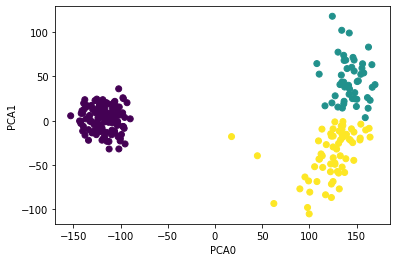

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(wave_form) # clustered to 3 types
plt.scatter(x=result['PCA0'],y=result['PCA1'],c=kmeans.labels_)  # plot the result
plt.xlabel('PCA0')
plt.ylabel('PCA1')

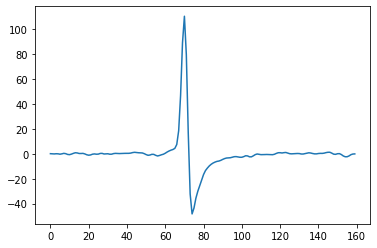

In [23]:
plt.plot(wave_form[kmeans.labels_==0].mean(axis=0))


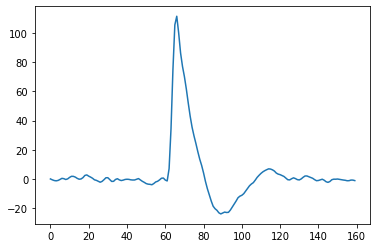

In [24]:
plt.plot(wave_form[kmeans.labels_==1].mean(axis=0))


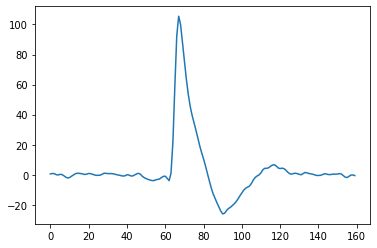

In [25]:
plt.plot(wave_form[kmeans.labels_==2].mean(axis=0))


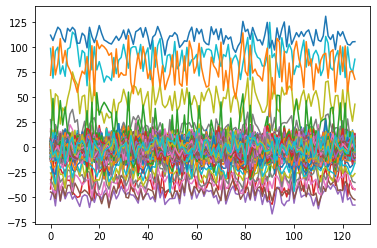

In [26]:
plt.plot(wave_form[kmeans.labels_==0]) ## overlay

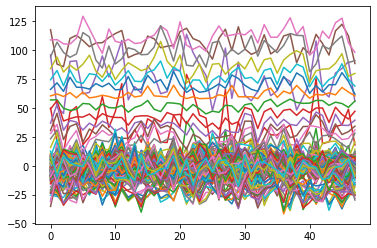

In [27]:
plt.plot(wave_form[kmeans.labels_==1]) ## overlay

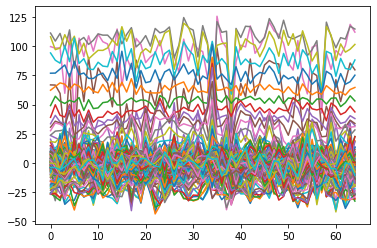

In [28]:
plt.plot(wave_form[kmeans.labels_==2]) ## overlay

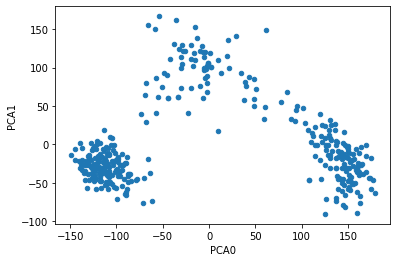

In [29]:
# try tf=8
spike_samp, wave_form = get_spikes(trace, tf=8)

pca = PCA(n_components=2)
pca.fit(wave_form)

result=pd.DataFrame(pca.transform(wave_form), columns=['PCA%i' % i for i in range(2)])
result.plot.scatter(x='PCA0',y='PCA1')  # still looks like 3 neurons

Text(0, 0.5, 'PCA1')

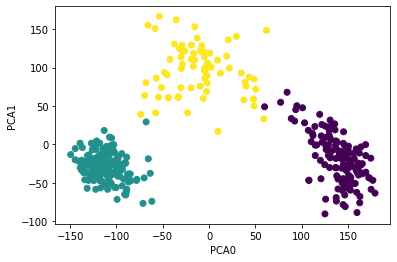

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(wave_form) # clustered to 3 types
plt.scatter(x=result['PCA0'],y=result['PCA1'],c=kmeans.labels_)  # plot the result
plt.xlabel('PCA0')
plt.ylabel('PCA1')

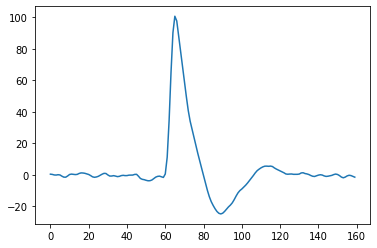

In [31]:
plt.plot(wave_form[kmeans.labels_==0].mean(axis=0))


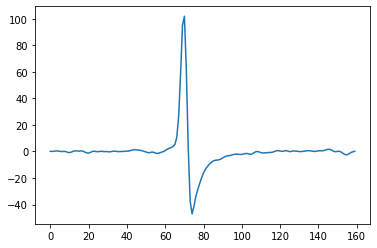

In [32]:
plt.plot(wave_form[kmeans.labels_==1].mean(axis=0))


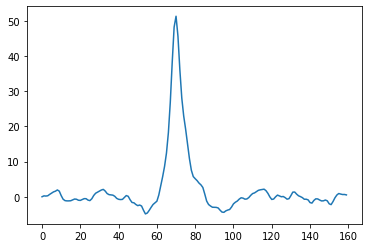

In [33]:
plt.plot(wave_form[kmeans.labels_==2].mean(axis=0))


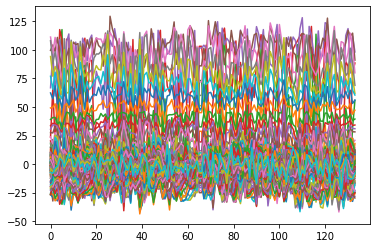

In [34]:
plt.plot(wave_form[kmeans.labels_==0]) ## overlay

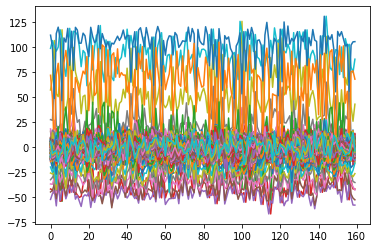

In [35]:
plt.plot(wave_form[kmeans.labels_==1]) ## overlay

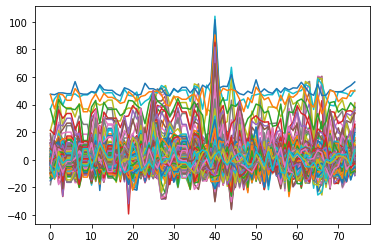

In [36]:
plt.plot(wave_form[kmeans.labels_==2]) ## overlay